import libraries

In [149]:
import numpy as np
import pandas as pd
import random
import missingno as msn
import seaborn as sns

from scipy import stats 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

directories path

In [2]:
cd /Users/yulduzerkiniy/Desktop/Probablity and Statistics/titanic_project

/Users/yulduzerkiniy/Desktop/Probablity and Statistics/titanic_project


Data upload

In [123]:
TRAIN_DATASET = './train.csv'

since it's not about prediction, I just want join two datasets to have more data

In [124]:
df = pd.read_csv(TRAIN_DATASET, sep=',')

In [125]:
df.size

10692

In [126]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


let's see what data we have

In [31]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


data dictionary:
    Pclass - passenger class : 1,2,3.
    SibSp - # of siblings / spouses aboard the Titanic.
    Parch - # of parents / children aboard the Titanic.
    Ticket  - ticket number.
    Fare - Passenger fare.
    Cabin - cabin number.
    Embarked - Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton.

In [117]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

let's search for missing values

In [71]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
df.isnull().sum()/df.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

comment: I was planning to make some age-survived analysis, but Age seems to have lots of null values, 19%. Possibly, I could replace them with a median. Cabin is too unreliable, it has 77% missing values, so I'll drop it.

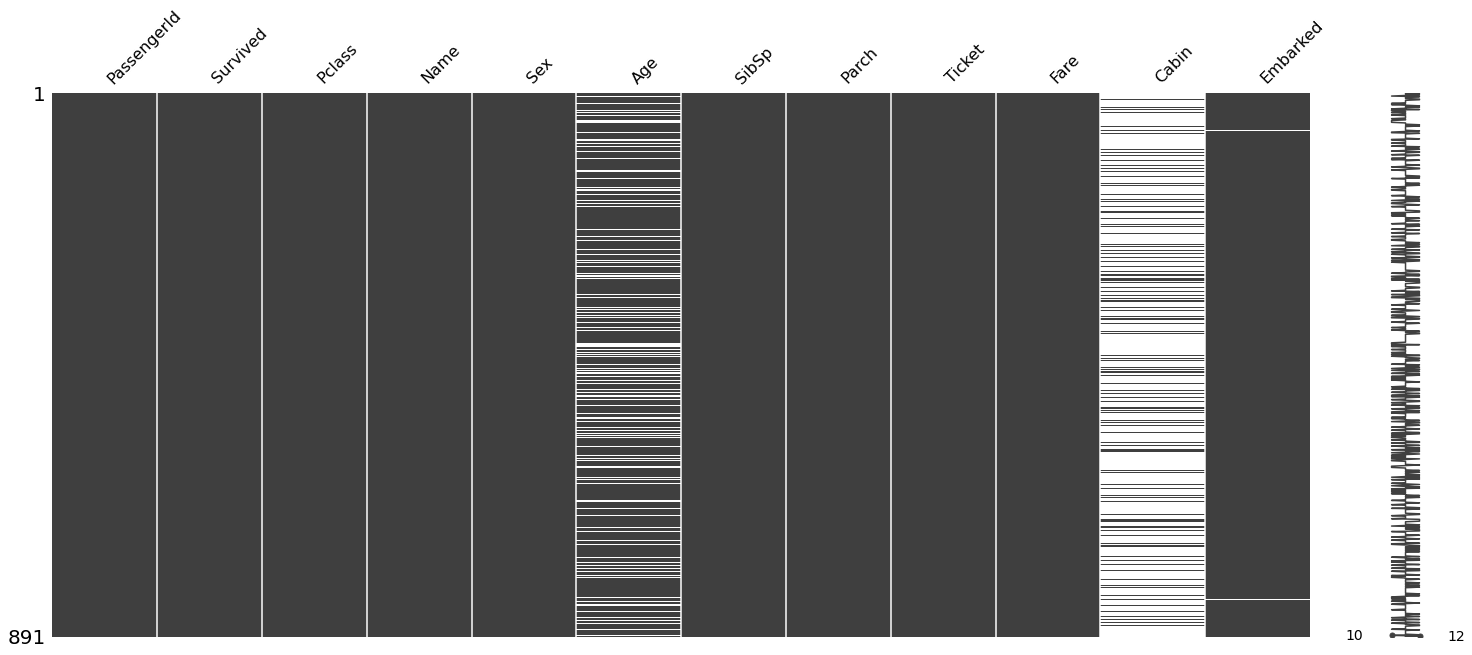

In [36]:
msn.matrix(df)
plt.show()

In [38]:
df.drop('Cabin', axis=1, inplace=True)

In [111]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,3.000000,0.000000,3.00,3.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Data visualization

In [42]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

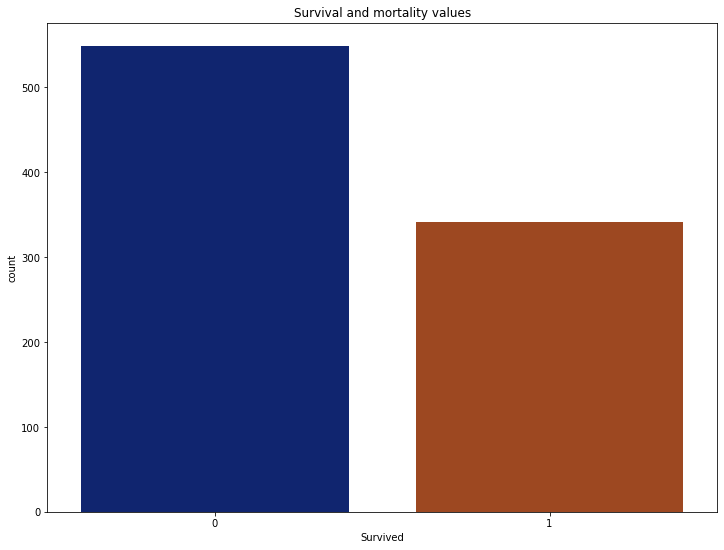

In [43]:
plt.figure(figsize=(12,9))
sns.set_palette('dark')
sns.countplot(x='Survived',data=df)
plt.title('Survival and mortality values')
plt.show()

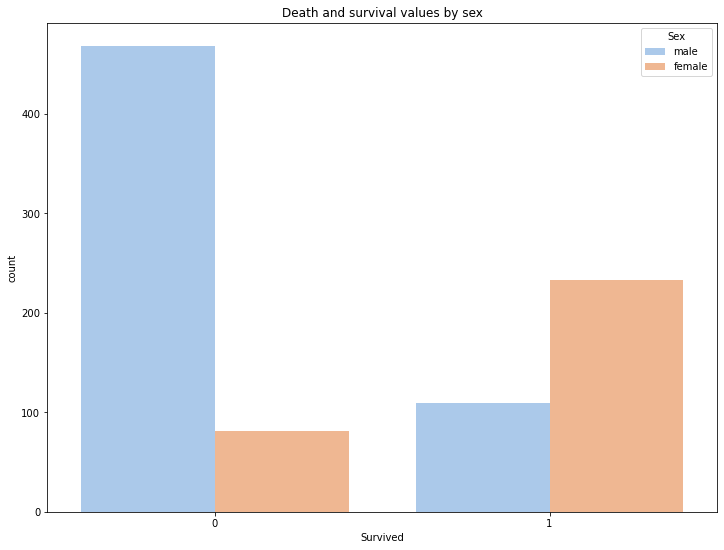

In [100]:
plt.figure(figsize=(12,9))
sns.set_palette('pastel')
sns.countplot(x='Survived',hue='Sex',data=df)
plt.title('Death and survival values by sex')
plt.show() 

it quite seems survival truely depends on sex. Seems like women were more likely to survive.

we can also can check the hypothesis: passengers' class effect their fare. Like, a first class passenger in average spends more money on board in comparison to other classes's passengers. For  that let's initialize a hypothesis H0: average fare for each classes are equal

In [127]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Fare_class1 is fare of passengers in the first class

In [131]:
Fare_class1 = df['Fare'][(df["Pclass"] == 1)]
Fare_class2 = df['Fare'][(df["Pclass"] == 2)]
Fare_class3 = df['Fare'][(df["Pclass"] == 3)]

In [134]:
n1 = Fare_class1.size
n2 = Fare_class2.size
n3 = Fare_class3.size
n = n1+n2+n3
n

891

In [135]:
k=3 #3 classes

let's see the average fare for each class

In [136]:
fare1_mean = np.mean(Fare_class1)
fare1_mean

84.15468749999992

In [137]:
fare2_mean = np.mean(Fare_class2)
fare2_mean

20.66218315217391

In [138]:
fare3_mean = np.mean(Fare_class3)
fare3_mean

13.675550101832997

obviously, the averages are quite different. so, let's try to decline H0

In [140]:
Fares = np.concatenate([Fare_class1, Fare_class2, Fare_class3])

In [141]:
fares_mean = np.mean(Fares)
fares_mean

32.204207968574636

variances:

In [142]:
s2 = np.sum((Fares - fares_mean)**2)
s2

2197798.7927113734

In [143]:
s2_f = ((fare1_mean - fares_mean)**2) * n1 + ((fare2_mean - fares_mean)**2) * n2 + ((fare3_mean - fares_mean)**2) * n3
s2_f

776030.0565787102

In [144]:
s2_res = s2 - s2_f
s2_res

1421768.7361326632

In [145]:
k = 3

k1 = k-1
k2 = n-k

sigma2_f = s2_f/k1
sigma2_res = s2_res/k2

sigma2_f, sigma2_res

(388015.0282893551, 1601.0909190683144)

In [146]:
T = sigma2_f/sigma2_res
T

242.3441565174473

In [150]:
alpha = 0.05

F_crit = stats.f.ppf(1-alpha, k1, k2)
F_crit

3.00586136120289

since, T is much much greater than F_crit, we decline H0. Hence, I conclude to this theory that the passengers' fares indeed quite depends on their class.

Now, let's try to do some correlation analysis.

In [152]:
corr=df.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


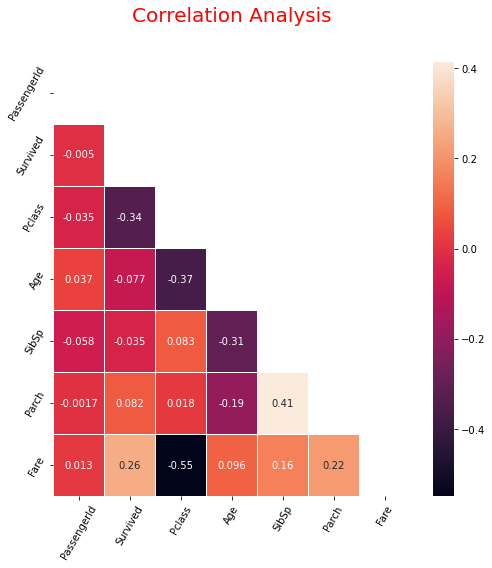

In [153]:
plt.figure(figsize=(8,8))
plt.title('Correlation Analysis',color='Red',fontsize=20,pad=40)
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(df.corr(), mask=mask, annot=True, linewidths=.5);
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
plt.show()

for sure PassengerId has no meaning for Survival. But Class and Survived has quite high correlation (-0.34), as expected. Also, Survived and Fare have quite some correlation, but this can be because of high Pclass-Fare correlation. But the strange thing is Age-Survived correlation, oddly low. I expected kids to be more protected